C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


NameError: name 'Perceptron' is not defined

In [5]:
import numpy as np

class SimplePerceptron:
    def __init__(self, learning_rate=0.1, n_iterations=10):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)
                predicted = 1 if linear_output >= 0 else 0

                update = self.learning_rate * (y[idx] - predicted)
                self.weights += update * x_i

    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        return [1 if i >= 0 else 0 for i in linear_output]

if __name__ == "__main__":
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([0, 0, 0, 1]) 

    perceptron = SimplePerceptron(learning_rate=0.1, n_iterations=10)
    perceptron.fit(X, y)

    predictions = perceptron.predict(X)
    print("Predictions:", predictions)


Predictions: [1, 1, 1, 1]


Accuracy: 100.00%


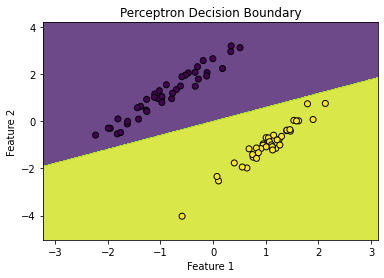

In [3]:
import numpy as np
import matplotlib.pyplot as plt
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
perceptron = Perceptron(learning_rate=0.01, n_iterations=1000)
perceptron.fit(X_train, y_train)
predictions = perceptron.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_train, y_train, perceptron)

